# data

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('C:/Users/User1/Downloads/iris (1).xls')

In [3]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df.mean()

SL    5.855944
SW    3.049306
PL    3.756250
PW    1.198667
dtype: float64

In [9]:
df['SL']= df['SL'].fillna(df['SL'].mean())

In [10]:
df.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
df['SW']= df['SW'].fillna(df['SW'].mean())

In [12]:
df.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
df['PL']= df['PL'].fillna(df['PL'].mean())

In [14]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All the columns having missing values are filled

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'SL')

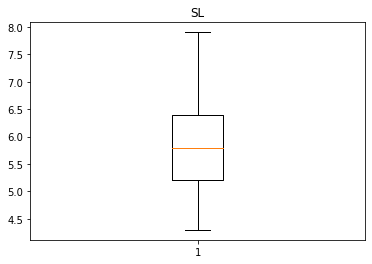

In [16]:
plt.boxplot(df['SL'])
plt.title('SL')

Text(0.5, 1.0, 'SW')

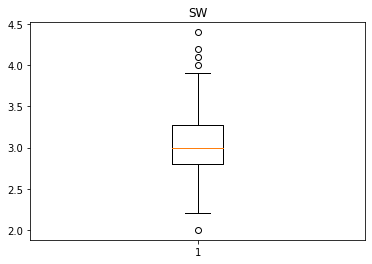

In [17]:
plt.boxplot(df['SW'])
plt.title('SW')

In [18]:
Q1 = np.percentile(df['SW'],25,interpolation='midpoint')
Q2 = np.percentile(df['SW'],50,interpolation='midpoint')
Q3 = np.percentile(df['SW'],75,interpolation='midpoint')

In [19]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [20]:
df['SW'].median()

3.0

In [21]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

In [22]:
print(low_lim)
print(Up_lim)

2.1249999999999996
3.9250000000000003


In [23]:
outlier = []
for x in df['SW']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [24]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [25]:
ind1 = df['SW']>Up_lim
df.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [26]:
df.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'SW')

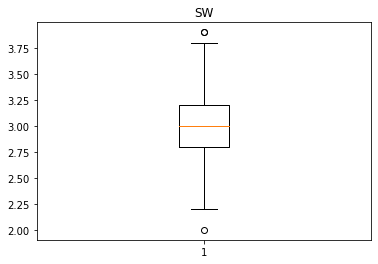

In [27]:
plt.boxplot(df['SW'])
plt.title('SW')

Text(0.5, 1.0, 'PL')

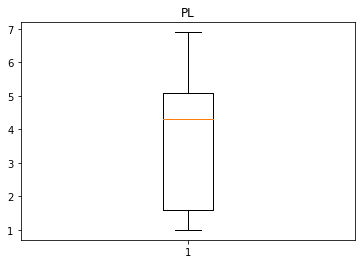

In [28]:
plt.boxplot(df['PL'])
plt.title('PL')

Text(0.5, 1.0, 'PW')

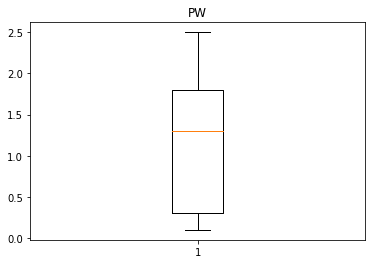

In [29]:
plt.boxplot(df['PW'])
plt.title('PW')

# Pre processing

In [78]:
df=pd.get_dummies(df)

In [79]:
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [30]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.080388,0.841988,0.807681
SW,-0.080388,1.000000,-0.359849,-0.283140
PL,0.841988,-0.359849,1.000000,0.933573
PW,0.807681,-0.283140,0.933573,1.000000


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
df['Classification']=le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [33]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Classification'])
y=df['Classification']
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [34]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions= model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.04903781874103711
R squared value is: 0.9327225047760161


# Scaling

In [36]:
X.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.864326,3.018465,3.820805,1.225342
std,0.817050,0.382594,1.703421,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [44]:
type(X)

pandas.core.frame.DataFrame

In [45]:
from sklearn import preprocessing

In [46]:
standardisation=preprocessing.StandardScaler()
X= standardisation.fit_transform(X)

In [49]:
X=pd.DataFrame(X)

In [50]:
X.describe()

,0,1,2,3
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,1.331602e-15,3.231814e-16,3.764112e-16,-6.661338e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-1.921193e+00,-2.671164e+00,-1.661665e+00,-1.494001e+00
25%,-9.079873e-01,-5.729749e-01,-1.308220e+00,-1.228482e+00
50%,-1.029421e-02,-4.842780e-02,2.822818e-01,9.911512e-02
75%,6.578763e-01,4.761194e-01,7.535416e-01,7.629136e-01
max,2.500069e+00,2.312034e+00,1.813876e+00,1.692232e+00


In [61]:
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions= model.predict(X_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.049037818741037166
R squared value is: 0.9327225047760161


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy is:",accuracy_score(y_pred,y_test))

accuracy is: 0.9333333333333333


In [68]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


# Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333
